<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Fake News Detection - Classifier</h1>

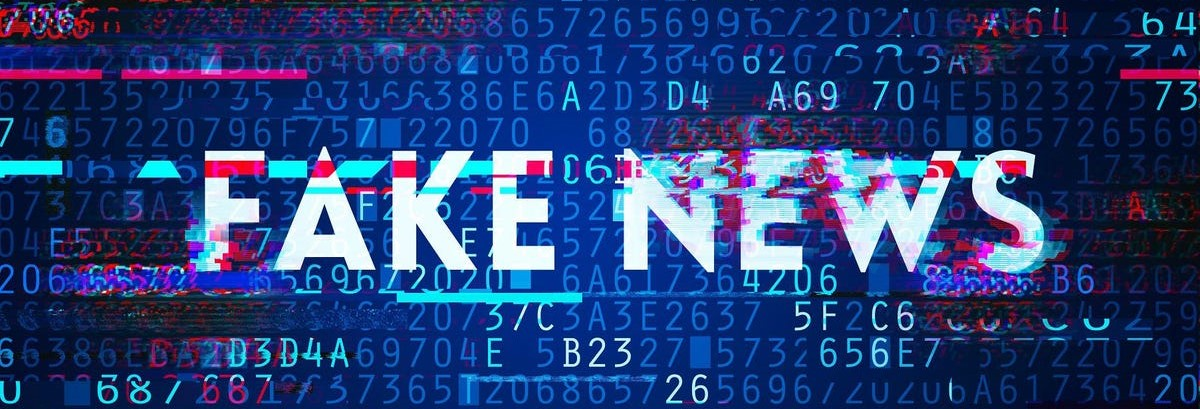

This project aims to build a fake news classifier that can accurately distinguish fake news from genuine news.  
The dataset is devided into 2 classes. Using RNN I made a classifier that can identify whether the news is fake or true. 
After cleaning the data I performed tokenization, and encoded the data. Then using RNN architecture and LSTM model I build this classifier.The dataset is provided along with source codes. In the notebook all instructions are provide. 
Some theory, intuition behind RNN, LSTM and problems with Gradient Descent(vinishing gradient) is covered.  

<a id="table"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>

* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOAD THE DATASET](#2)
  
* [3. EXPLORATORY SOME INFORMATION ABOUT DATASET](#3)

* [4. NLP](#4)

* [5. PREDICTION ](#5)

* [6. AUTHOR MESSAGE ](#6)

In [14]:
#Loading essential libraries

In [15]:

import numpy as np
import pandas as pd

In [16]:
# Loading the dataset

In [17]:

df = pd.read_csv('kaggle_fake_train.csv')

# **Exploring the dataset**

In [19]:
df.shape

(20800, 5)

In [20]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [21]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [22]:
# Dropping the 'id' column
df.drop('id', axis=1, inplace=True)

In [23]:
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [24]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

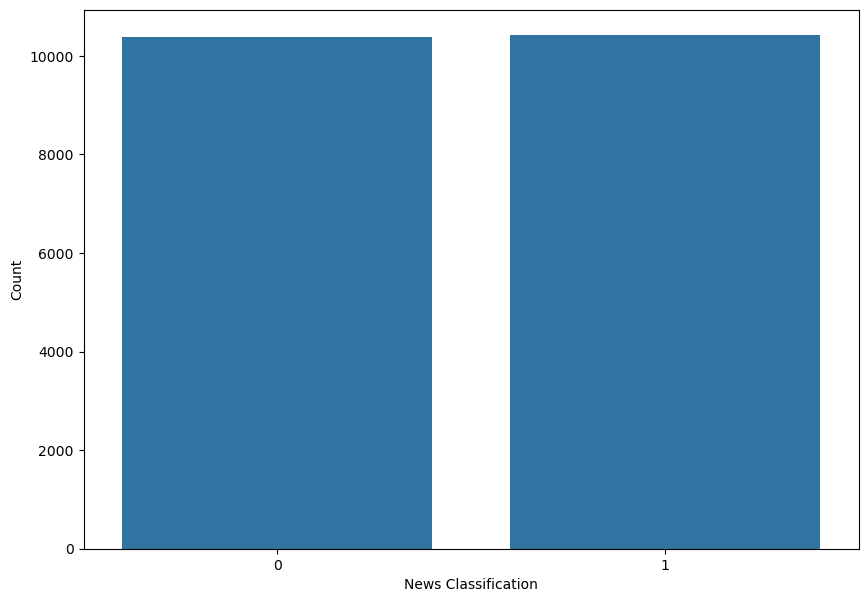

In [25]:
# Visualizing the count of 'fake news' in the dataset
plt.figure(figsize=(10,7))
sns.countplot(x='label', data=df)
plt.xlabel('News Classification')
plt.ylabel('Count')

# **Data Cleaning and Preprocessing**

In [27]:
print(df.shape)

(20800, 4)


In [28]:
# Finding any NaN values
df.isna().any()

title      True
author     True
text       True
label     False
dtype: bool

In [29]:
# Dropping NaN values
df.dropna(inplace=True)
print(df.shape)

(18285, 4)


In [30]:
news = df.copy()

In [31]:
news.reset_index(inplace=True)

In [32]:
# Importing essential libraries for performing Natural Language Processing on 'kaggle_fake_train' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ippilirahul/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<a id="6"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;"> Nlp </h1>  

In [34]:
# Cleaning the news
corpus = []
ps = PorterStemmer()

for i in range(0,news.shape[0]):

  # Cleaning special character from the news-title
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.title[i])

  # Converting the entire news-title to lower case
  title = title.lower()

  # Tokenizing the news-title by words
  words = title.split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  title = ' '.join(words)

  # Building a corpus of news-title
  corpus.append(title)

In [35]:
corpus[0:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [36]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [37]:
X.shape

(18285, 5000)

In [38]:
X[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
# Extracting dependent variable from the dataset
y = news['label']

# **Model Building**

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## *Multinomial Naive Bayes*

In [43]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [44]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [45]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 90.16%
Precision score is: 0.87
Recall score is: 0.91


In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [47]:
nb_cm

array([[1823,  217],
       [ 143, 1474]])

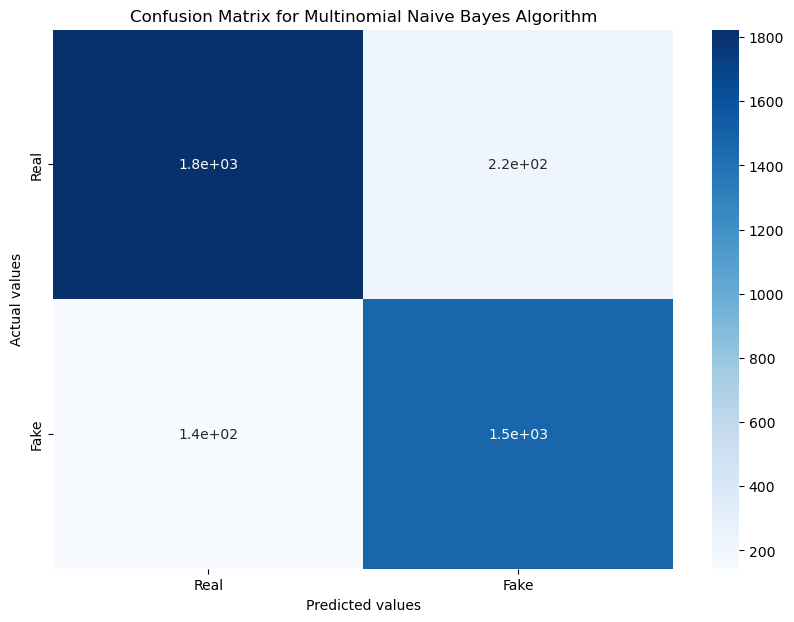

In [48]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [49]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 90.51%
Accuracy score for alpha=0.2 is: 90.51%
Accuracy score for alpha=0.3 is: 90.59%
Accuracy score for alpha=0.4 is: 90.51%
Accuracy score for alpha=0.5 is: 90.43%
Accuracy score for alpha=0.6 is: 90.37%
Accuracy score for alpha=0.7 is: 90.27%
Accuracy score for alpha=0.8 is: 90.21%
Accuracy score for alpha=0.9 is: 90.16%
Accuracy score for alpha=1.0 is: 90.16%
--------------------------------------------
The best accuracy is 90.59% with alpha value as 0.3


## *Logistic Regression*

In [51]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [52]:
# Predicting the Test set results
lr_y_pred = lr_classifier.predict(X_test)

In [53]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 93.55%
Precision score is: 0.89
Recall score is: 0.97


In [54]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [55]:
lr_cm

array([[1851,  189],
       [  47, 1570]])

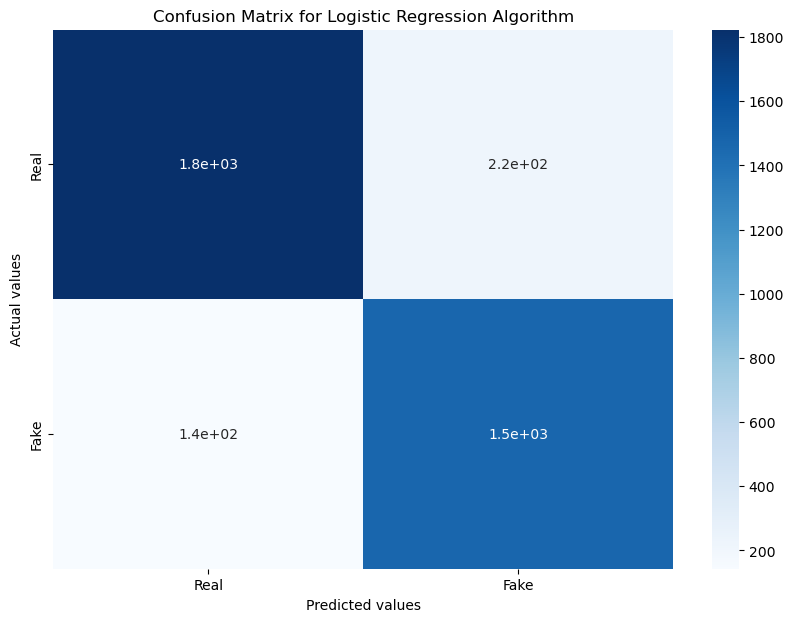

In [56]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

In [57]:
# Hyperparameter tuning the Logistic Regression Classifier
best_accuracy = 0.0
c_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = LogisticRegression(C=i, random_state=0)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    c_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(c_val,1)))

Accuracy score for C=0.1 is: 92.02%
Accuracy score for C=0.2 is: 92.84%
Accuracy score for C=0.3 is: 93.19%
Accuracy score for C=0.4 is: 93.36%
Accuracy score for C=0.5 is: 93.49%
Accuracy score for C=0.6 is: 93.52%
Accuracy score for C=0.7 is: 93.57%
Accuracy score for C=0.8 is: 93.57%
Accuracy score for C=0.9 is: 93.52%
Accuracy score for C=1.0 is: 93.55%
--------------------------------------------
The best accuracy is 93.57% with C value as 0.7


In [58]:
classifier = LogisticRegression(C=0.8, random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=0.8, random_state=0)

<a id="6"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;"> Prediction </h1>  

In [60]:
def fake_news(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return classifier.predict(temp)

In [61]:
# Importing test dataset
df_test = pd.read_csv('kaggle_fake_test.csv')

In [62]:
df_test.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [63]:
news_title = df_test['title']

In [64]:
news_title.shape

(5200,)

In [65]:
# For generating random integer
from random import randint

In [66]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: For Mahmoud Abbas, a Gesture. For Critics, a Betrayal. - The New York Times
Prediction: This is a REAL news.


In [67]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: D.A. Henderson, Doctor Who Helped End Smallpox Scourge, Dies at 87 - The New York Times
Prediction: This is a REAL news.


In [68]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Bronx Assemblyman Files Complaint Against the Police - The New York Times
Prediction: This is a REAL news.


In [69]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Watch: Trump Boards, Departs Air Force One for the First Time - Breitbart
Prediction: This is a REAL news.


<a id="6"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;"> Author Message </h1>

The spreading of fake news among people is not new and it has already been reported since ancient ages. However, during the era of the internet and social media, the spreading of fake news became serious threat. Such false information should be detected as soon as possible with great accuracy to cut the negative impact on the readers. In this repository, the fake news is classified from the real news with the help of Natural Language Processing (NLP) techniques and machine learning algorithms. Moreover, machine learning’s well-known algorithms I.e. Support Vector Machine (SVM), Random Forest (RF), Naïve Bayes (NB), Logistic Regression (LR) is compared along with the custom ensemble algorithms i.e. Voting Classifier (VC) and Stacking Classifier (SC). The easy-to-use web-based interface is also proposed to classify the news on the go. The classification algorithms show the promising results on the classification of fake news from the real news. However, the SC performed exceptionally well as compare to all other algorithms in the list.